In [1]:
#Importing Pandas and running the table

import pandas as pd
tele_df = pd.read_csv('churn_data.csv')
tele_df

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Unnamed: 13,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,NaN,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,NaN,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,NaN,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,NaN,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,NaN,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,No,No,No internet service,No internet service,No internet service,...,No internet service,NaN,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,...,Yes,NaN,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,NaN,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,...,No,NaN,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [2]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   gender            7042 non-null   object 
 2   SeniorCitizen     7042 non-null   int64  
 3   Partner           7042 non-null   object 
 4   Dependents        7042 non-null   object 
 5   MultipleLines     7042 non-null   object 
 6   InternetService   7042 non-null   object 
 7   OnlineSecurity    7042 non-null   object 
 8   OnlineBackup      7042 non-null   object 
 9   DeviceProtection  7042 non-null   object 
 10  TechSupport       7042 non-null   object 
 11  StreamingTV       7042 non-null   object 
 12  StreamingMovies   7042 non-null   object 
 13  Unnamed: 13       0 non-null      float64
 14  tenure            7042 non-null   int64  
 15  PhoneService      7042 non-null   object 
 16  Contract          7042 non-null   object 


In [3]:
#Dropping the columns to make dataset smaller.

tele_df.drop(tele_df.columns[[0, 13, 5, 7, 8, 9, 11, 12, 16, 15, 16, 3, 4, 20]], axis = 1, inplace = True)

In [4]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7042 non-null   object 
 1   SeniorCitizen     7042 non-null   int64  
 2   InternetService   7042 non-null   object 
 3   TechSupport       7042 non-null   object 
 4   tenure            7042 non-null   int64  
 5   PaperlessBilling  7042 non-null   object 
 6   PaymentMethod     7042 non-null   object 
 7   MonthlyCharges    7042 non-null   float64
 8   Churn             7042 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 495.3+ KB


In [5]:
#Checking non-null values.

tele_df.isnull().sum()

gender              0
SeniorCitizen       0
InternetService     0
TechSupport         0
tenure              0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

Traing and Validating Test Sets

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_val_df, test_df = train_test_split(tele_df, test_size=0.2, random_state=10)
train_df, val_df = train_test_split(tele_df, test_size=0.25, random_state=10)

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (5281, 9)
val_df.shape : (1761, 9)
test_df.shape : (1409, 9)


In [8]:
input_cols = list(train_df.columns)[0:-1]
target_col = 'Churn'

print(input_cols),
target_col

['gender', 'SeniorCitizen', 'InternetService', 'TechSupport', 'tenure', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']


'Churn'

In [9]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [10]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [11]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [12]:
train_inputs

,gender,SeniorCitizen,InternetService,TechSupport,tenure,PaperlessBilling,PaymentMethod,MonthlyCharges
6643,Female,1,Fiber optic,No,3,Yes,Bank transfer (automatic),74.60
4923,Female,0,DSL,No,52,Yes,Bank transfer (automatic),49.75
3169,Male,0,DSL,Yes,52,Yes,Electronic check,68.75
672,Female,0,Fiber optic,No,1,Yes,Mailed check,75.05
3004,Male,0,Fiber optic,No,1,No,Mailed check,89.15
...,...,...,...,...,...,...,...,...
1180,Male,0,DSL,Yes,39,Yes,Bank transfer (automatic),49.80
3441,Female,0,DSL,No,34,Yes,Mailed check,60.80
1344,Female,0,No,No internet service,28,No,Mailed check,20.50
4623,Male,1,Fiber optic,No,69,Yes,Bank transfer (automatic),95.35


In [13]:
train_targets

6643     No
4923     No
3169     No
672     Yes
3004    Yes
       ... 
1180     No
3441     No
1344     No
4623     No
1289     No
Name: Churn, Length: 5281, dtype: object

Checking Numerical and Categorical Columns

In [14]:
import numpy as np

In [15]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [16]:
train_inputs[numeric_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5281.000000,5281.000000,5281.000000
mean,0.164931,32.291233,64.902689
std,0.371153,24.528501,29.940486
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.050000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.800000
max,1.000000,72.000000,118.750000


In [17]:
train_inputs[categorical_cols].nunique()

gender              2
InternetService     3
TechSupport         3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

Scaling Numeric Values

In [18]:
tele_df[numeric_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7042.000000,7042.000000
mean,0.162170,32.366373,64.755886
std,0.368633,24.557955,30.088238
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


MinMaxScaler for making values between 0 and 1 for sigmoid curve

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(tele_df[numeric_cols])

MinMaxScaler()

In [22]:
print('Minimum:')
print(list(scaler.data_min_))

print('Maximum:')
print(list(scaler.data_max_))

Minimum:
[0.0, 0.0, 18.25]
Maximum:
[1.0, 72.0, 118.75]


In [23]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [24]:
train_inputs[numeric_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5281.000000,5281.000000,5281.000000
mean,0.164931,0.448489,0.464206
std,0.371153,0.340674,0.297915
min,0.000000,0.000000,0.000000
25%,0.000000,0.125000,0.177114
50%,0.000000,0.402778,0.518905
75%,0.000000,0.763889,0.711940
max,1.000000,1.000000,1.000000


Encoding Categorical Sets

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [27]:
encoder.fit(tele_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [28]:
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [29]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
encoded_cols

/Users/krishnakumarjena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['gender_Female',
 'gender_Male',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [30]:
%%time
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols].fillna('Unknown'))

CPU times: user 49.3 ms, sys: 1.65 ms, total: 51 ms
Wall time: 49.9 ms


In [31]:
pd.set_option('display.max_columns', None)

In [32]:
test_inputs

,gender,SeniorCitizen,InternetService,TechSupport,tenure,PaperlessBilling,PaymentMethod,MonthlyCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6417,Female,1.0,Fiber optic,No,0.708333,Yes,Electronic check,0.589552,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1948,Female,0.0,Fiber optic,No,0.027778,No,Electronic check,0.621891,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4497,Male,1.0,Fiber optic,No,0.833333,Yes,Electronic check,0.793035,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
66,Male,0.0,Fiber optic,No,0.652778,Yes,Electronic check,0.603483,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1705,Female,1.0,Fiber optic,Yes,0.763889,No,Electronic check,0.718408,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,Female,0.0,No,No internet service,0.166667,No,Electronic check,0.018905,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5937,Female,1.0,Fiber optic,No,0.111111,Yes,Electronic check,0.654229,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6372,Male,0.0,No,No internet service,0.055556,No,Credit card (automatic),0.012438,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1767,Female,0.0,Fiber optic,Yes,0.986111,Yes,Credit card (automatic),0.964179,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [33]:
val_inputs

,gender,SeniorCitizen,InternetService,TechSupport,tenure,PaperlessBilling,PaymentMethod,MonthlyCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6417,Female,1.0,Fiber optic,No,0.708333,Yes,Electronic check,0.589552,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1948,Female,0.0,Fiber optic,No,0.027778,No,Electronic check,0.621891,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4497,Male,1.0,Fiber optic,No,0.833333,Yes,Electronic check,0.793035,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
66,Male,0.0,Fiber optic,No,0.652778,Yes,Electronic check,0.603483,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1705,Female,1.0,Fiber optic,Yes,0.763889,No,Electronic check,0.718408,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,Female,0.0,DSL,No,0.833333,No,Electronic check,0.316418,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6573,Female,0.0,DSL,Yes,0.625000,No,Bank transfer (automatic),0.325871,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6443,Female,0.0,No,No internet service,0.125000,No,Bank transfer (automatic),0.012438,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2760,Male,0.0,No,No internet service,0.361111,Yes,Credit card (automatic),0.023881,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [34]:
val_targets

6417    Yes
1948    Yes
4497     No
66       No
1705     No
       ... 
2626     No
6573     No
6443     No
2760     No
606      No
Name: Churn, Length: 1761, dtype: object

Training Logistics Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression(solver='liblinear')

In [37]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [38]:
print(numeric_cols + encoded_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Female', 'gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [39]:
print(model.coef_.tolist())

[[0.33051414667593243, -2.9537750234926685, 0.2116352424020868, -0.10277364295215576, -0.11367022664495315, -0.3311496737753989, 0.623568700524266, -0.5088628963461865, 0.40738732771346464, -0.5088628963461865, -0.1149683009644623, -0.3563557669335568, 0.1399118973361931, -0.11596995717020246, -0.22618064416684774, 0.32347101154455293, -0.19776427980471317]]


In [40]:
print(model.intercept_)

[-0.21644387]


Making Predictions and Evaluating Models

In [41]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [42]:
train_preds = model.predict(X_train)

In [43]:
train_preds

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [44]:
train_targets

6643     No
4923     No
3169     No
672     Yes
3004    Yes
       ... 
1180     No
3441     No
1344     No
4623     No
1289     No
Name: Churn, Length: 5281, dtype: object

In [45]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.25696872, 0.74303128],
       [0.90770977, 0.09229023],
       [0.91211902, 0.08788098],
       ...,
       [0.95413118, 0.04586882],
       [0.83383359, 0.16616641],
       [0.97649282, 0.02350718]])

In [46]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(train_targets, train_preds)

0.797576216625639

Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.90272374, 0.09727626],
       [0.48667602, 0.51332398]])

In [51]:
#Importing all graphical libraries.


# import plotly.express as px
# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# import plotly.io as pio
# pio.renderers.default = 'iframe'
# from IPython.display import HTML


sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [52]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 79.76%


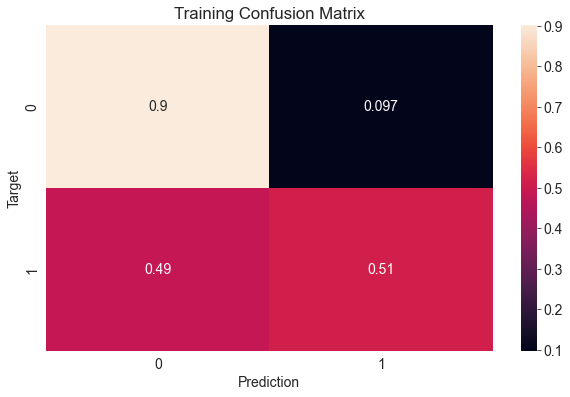

In [53]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 79.67%


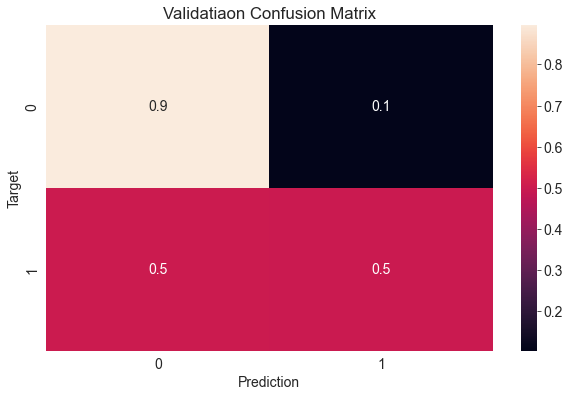

In [54]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 80.06%


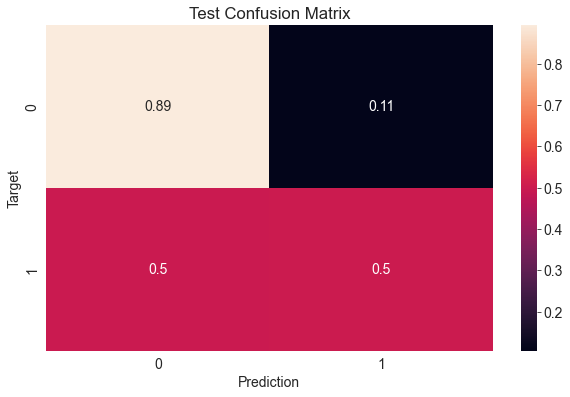

In [55]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [56]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [57]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [58]:
accuracy_score(test_targets, random_guess(X_test))

0.48403122782114977

In [59]:
accuracy_score(test_targets, all_no(X_test))

0.7601135557132718

Our random model gives arounf 48% accuracy whereas our model achieves 76%. However we have eliminated some columns to reduce the dataset size. 